In [2]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from astropy import units as u

In [6]:
def b_cb(n):
    '''
    'b' parameter in the Sersic function, from the Ciotti & Bertin (1999) 
    approximation.
    '''
    return - 1. / 3 + 2. * n + 4 / (405. * n) + 46 / (25515. * n**2)

def I_sersic(R, I0, Re, n):
    return I0 * np.exp(-b_cb(n) * (R / Re)**(1. / n))

In [7]:
# M/L data
R_ml = np.array([  0.        ,   0.7349215 ,   1.91174721,   4.08120149,
                   7.64759081,  12.93413124,  20.25980731,  29.13317763,
                   39.44163756,  65.51280086,  80.96893985,  98.0200458 ,
                   0.86976734,   2.0448544 ,   4.21577821,   7.7880899 ,
                   13.07311654,  20.3911794 ,  29.28234338,  38.05656496,  96.85770378])
ml = np.array([ 9.4317,  7.8231,  7.7191,  7.3846,  5.9704,  5.5007,  4.3501,
                2.4816,  2.6907,  2.4456,  2.0845,  2.5494,  8.3204,  7.4534,
                7.6805,  7.2888,  5.1276,  4.2385,  2.6341,  2.8206,  2.3604])
ml_err = np.array([ 0.66715,  0.5827 ,  0.55465,  0.50575,  0.52805,  0.61805,
                    0.77265,  0.2382 ,  0.50175,  0.5316 ,  0.67705,  0.93285,
                    0.69615,  0.5855 ,  0.53725,  0.5578 ,  0.5852 ,  0.94865,
                    0.2588 ,  0.49105,  0.53695])

In [8]:
# B band surface brightness
n = 4.67
Ie = 3.5e5 # Lsun / arcsec**2
Re = 100 # arcsec
I0 = Ie * np.exp(b_cb(n)) # Lsun / arcsec**2
dist = 28.05e3 # kpc
kpc_per_arcsec = dist * u.arcsec.to(u.rad)
I0_B = I0 * kpc_per_arcsec ** -2 # Lsun / kpc**2, conserved quantity with distance

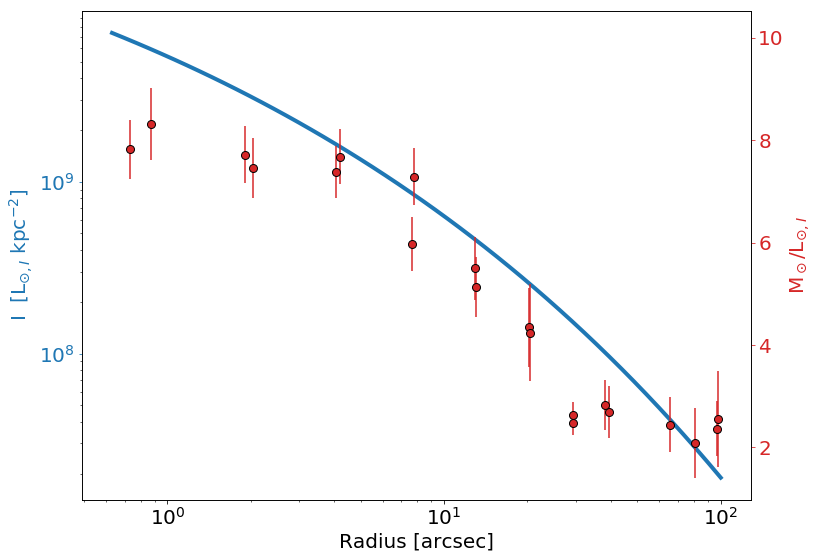

In [19]:
R = np.logspace(-0.2, 2)

mpl.rc("font", size=20)

fig, ax1 = plt.subplots(figsize=(12, 9))

ax1.plot(R, I_sersic(R, I0_B, Re, n), lw=4)
ax1.set_ylabel(r'I  [L$_{\odot, I}$ kpc$^{-2}$]', color="C0")
ax1.tick_params('y', colors='C0')

ax2 = ax1.twinx()
ax2.errorbar(R_ml, ml, yerr=ml_err, fmt='C3o', mec='k', ms=8)
ax2.set_ylabel(r"M$_\odot$/L$_{\odot, I}$", color="C3")
ax2.tick_params('y', colors='C3')

ax1.set_xlabel("Radius [arcsec]")
ax1.set_yscale("log")
ax1.set_xscale("log")